In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#loading data
data = pd.read_csv("adult.csv")

y_attr_names = data.columns.tolist()
X_data_numpy = data.to_numpy()
print(y_attr_names)
print(X_data_numpy[:, :])
# 

['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
[[25 'Private' 226802 ... 40 'United-States' '<=50K']
 [38 'Private' 89814 ... 50 'United-States' '<=50K']
 [28 'Local-gov' 336951 ... 40 'United-States' '>50K']
 ...
 [58 'Private' 151910 ... 40 'United-States' '<=50K']
 [22 'Private' 201490 ... 20 'United-States' '<=50K']
 [52 'Self-emp-inc' 287927 ... 40 'United-States' '>50K']]


# Boxplot & Histograms for numerical variables

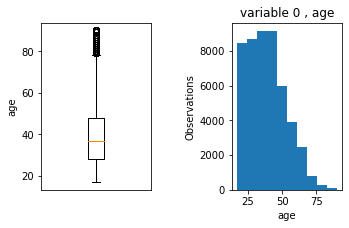

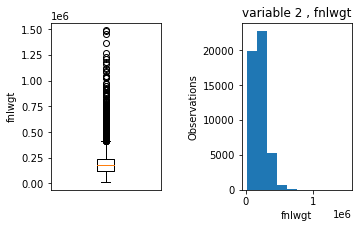

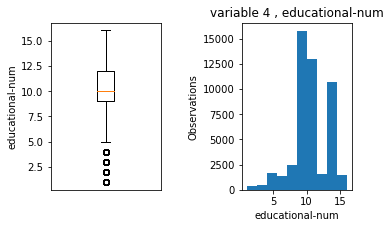

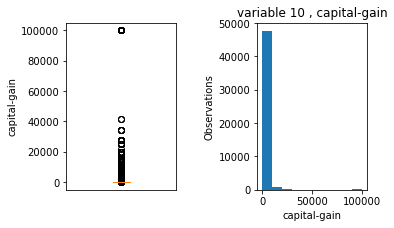

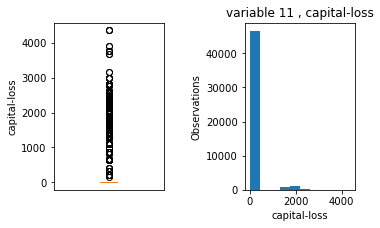

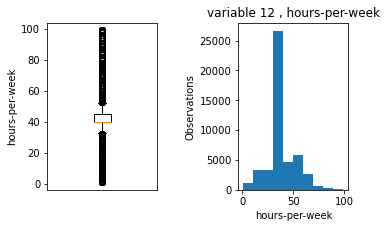

In [3]:
#data clean up
#eventueel te verwijderen columnen: relationship, marital-status, (capital gain/loss idk wat is), 
# print("Before clean up:",len(data))

# dataExcluding = df[data['native-country'] != '?']
# print("After removing '?' from 'native-country' column: ",len(dataExcluding))
# df = dataExcluding

numerical_variables = np.array(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'])

indices_numerical_variables = np.where(np.isin(y_attr_names, numerical_variables))[0]  # indices where numerical_variables coincide with y_attr_names
for i in range(indices_numerical_variables.size):
    f, (boxp, histo) = plt.subplots(1,2)
    f.tight_layout(pad=5.0)
    boxp.boxplot(X_data_numpy[:, indices_numerical_variables[i]])
    boxp.xaxis.set_visible(False)
    boxp.set(ylabel = "{}".format(numerical_variables[i]))
    plt.title("variable {} , {}".format(indices_numerical_variables[i], numerical_variables[i]))
    histo.hist(X_data_numpy[:, indices_numerical_variables[i]])
    plt.xlabel("{}".format(numerical_variables[i]))
    plt.ylabel("Observations")
#     plt.savefig("variable_{}_{}.png".format(indices_numerical_variables[i], numerical_variables[i])) save as png

plt.show()





# Bar Chart for Categorical variables

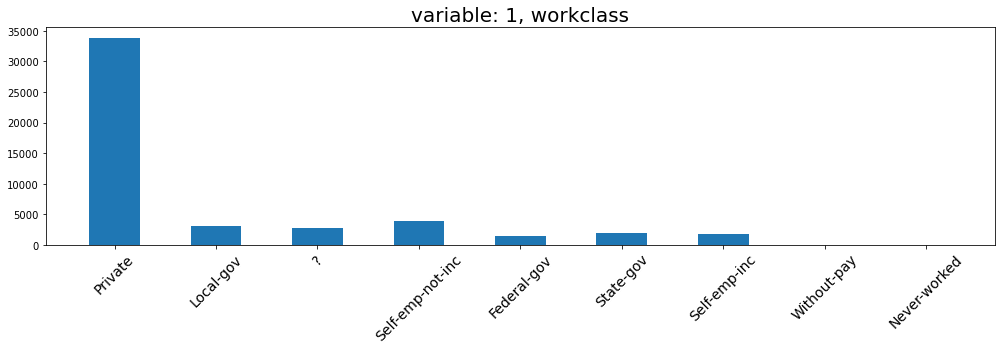

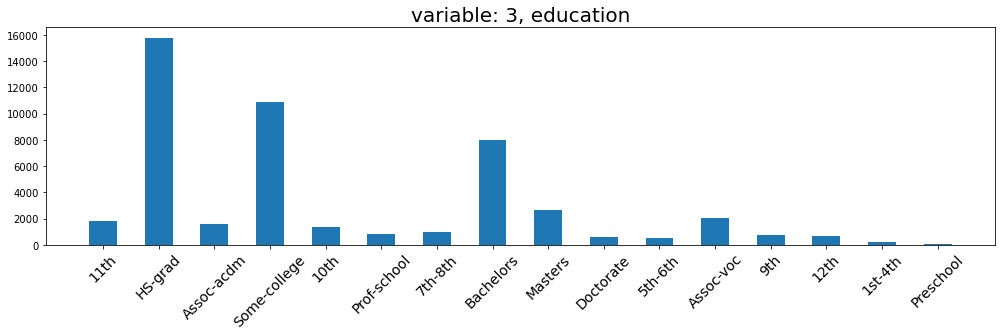

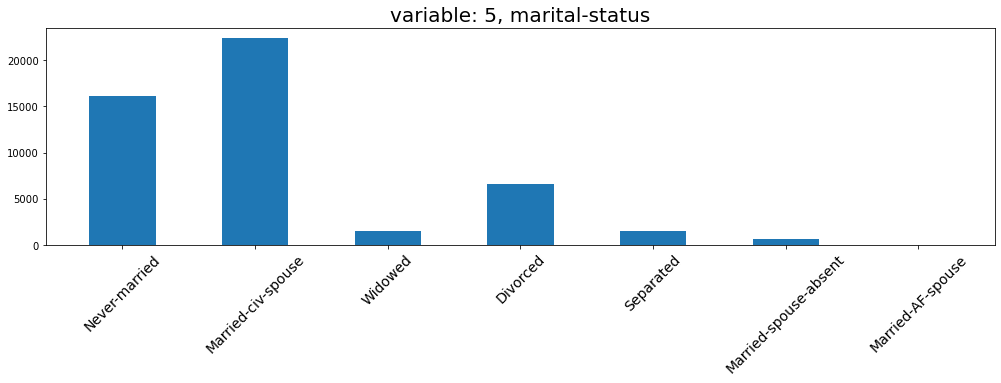

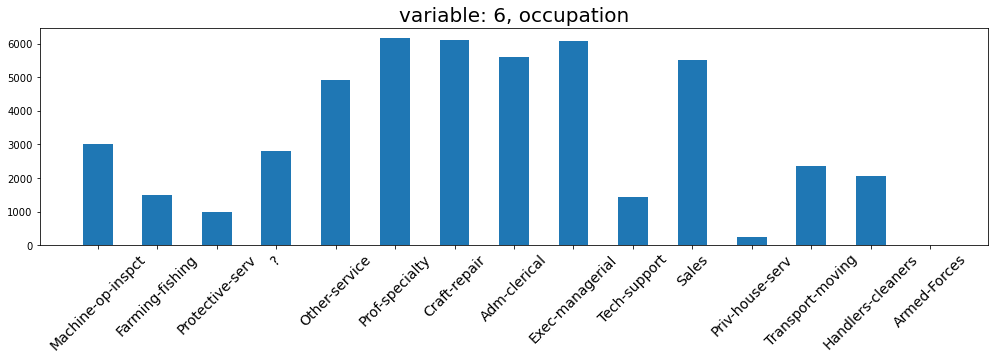

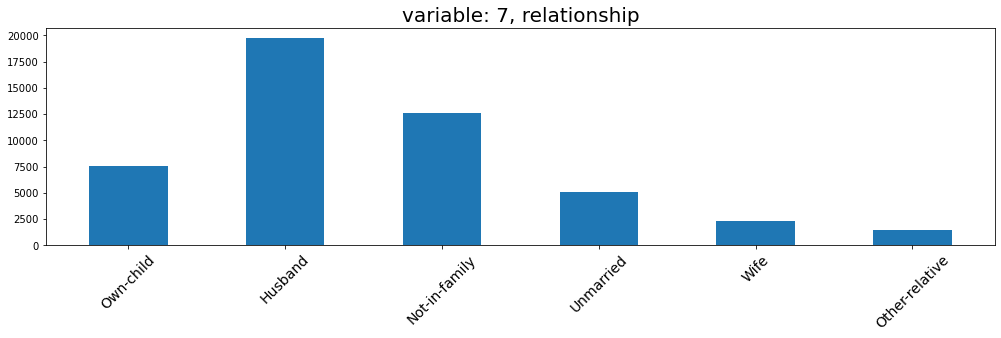

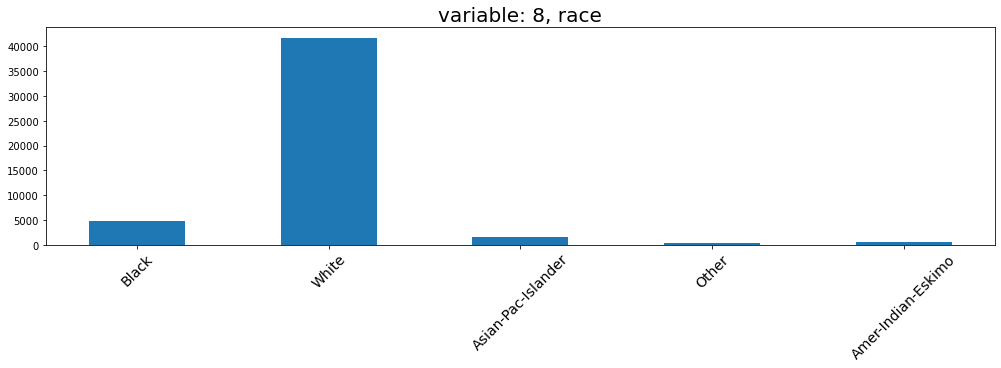

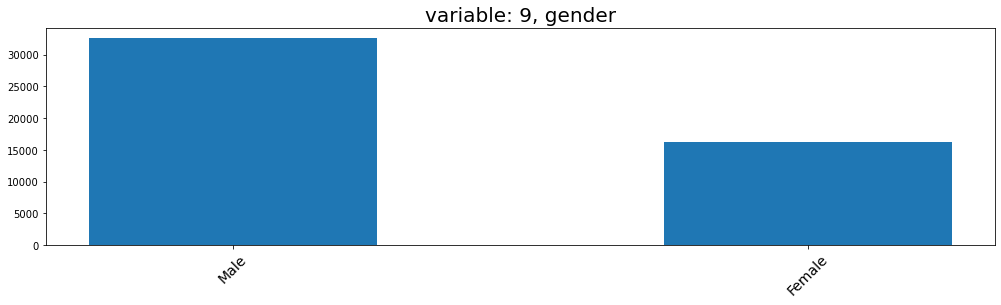

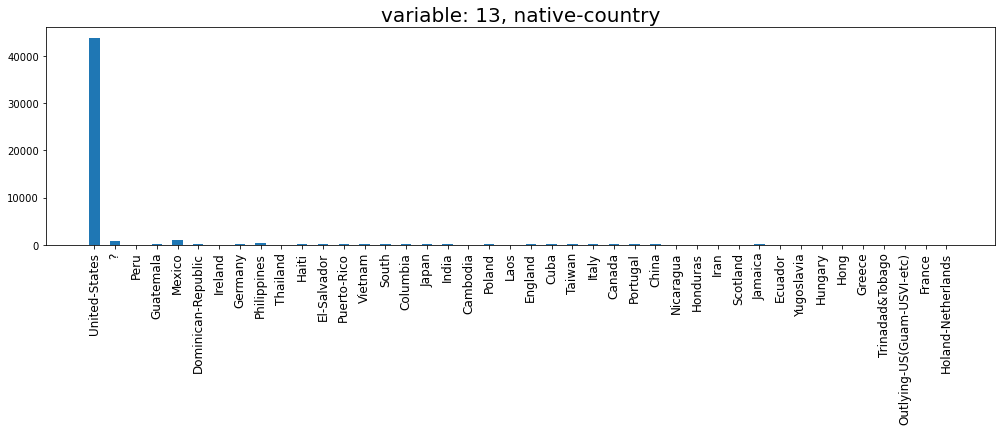

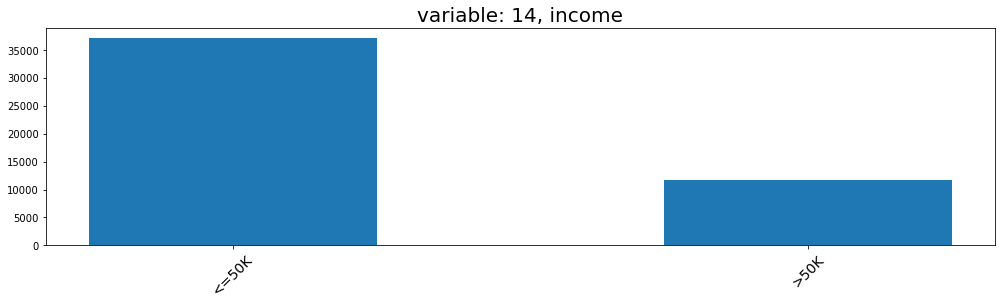

In [4]:
from collections import Counter

categorical_variables = np.array(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income'])

indices_categorical_variables = np.where(np.isin(y_attr_names, categorical_variables))[0]


for i in range(indices_categorical_variables.size) :
    counter = Counter(X_data_numpy[:, indices_categorical_variables[i]])
    categories = list(counter.keys())
    values = list(counter.values())
    plt.tight_layout
    fig = plt.figure(figsize=(17,4))
    plt.bar(categories, values, width = 0.5)
    plt.title("variable: {}, {}".format(indices_categorical_variables[i], categorical_variables[i]), fontsize=20)
    if (categorical_variables[i] == 'native-country') :
        plt.xticks(rotation=90, fontsize=12)
    else :
        plt.xticks(rotation=45, fontsize=14)
#     plt.savefig("variable_{}_{}.png".format(indices_categorical_variables[i], categorical_variables[i]), bbox_inches='tight')
    plt.show()
    

# Random Forest

We want to make the random forest predict if the amount earned is higher or lower than 50k based on the attributes.

Hyperparameters we want to tune: 

n_estimators: #trees in the forest (balancing performance and computing efficiency)

max_depth: the maximum depth of the tree. To prevent overfitting

min_samples_split: minimum number of samples required to split an internal node

min_samples_leaf: min number of samples to in a leaf node

max_features: ???

In [7]:
# first extract the last column and change the value to 
# be 1 if >50k earned, and 0 otherwise

data = pd.read_csv("adult.csv")
y = data.iloc[:, -1]
data = data.iloc[:, :-1]
data = pd.get_dummies(data, columns=categorical_variables[:-1])

y_attr_names = data.columns.tolist()
X = data.to_numpy()
print(X_data_numpy.shape)

for i in range(0, y.size) :
    if y[i] == '>50K' :
        y[i] = 1
    else :
        y[i] = 0
        
y = y.astype(int)
y = y.to_numpy()
print(y)

# categX = [X[:, n] for n in indices_categorical_variables[:-1]]
# print(categX)

(48842, 108)
[0 0 1 ... 0 0 1]


[(RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=11,
                       min_samples_split=11, n_estimators=50), 0.8403275332650972), (RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=11,
                       min_samples_split=11, n_estimators=50), 0.8335721596724668), (RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=11,
                       min_samples_split=11, n_estimators=50), 0.8392710892710893), (RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=11,
                       min_samples_split=11, n_estimators=50), 0.8419328419328419), (RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=11,
                       min_samples_split=11, n_estimators=50), 0.8474610974610974), (RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=11,
                       min_samples_split=11, n_estimators=50), 0.8312858312858313), (RandomForestClassifier(max_depth=5, max_feat

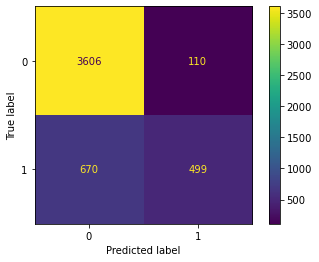

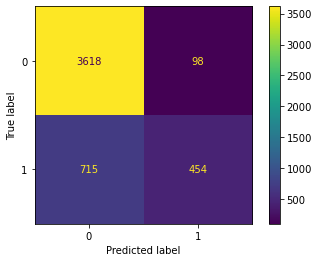

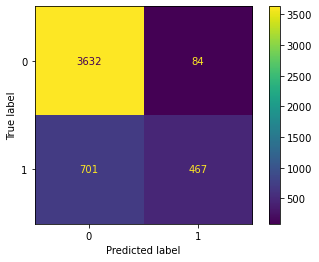

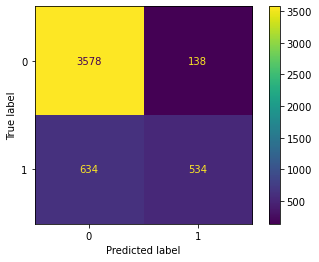

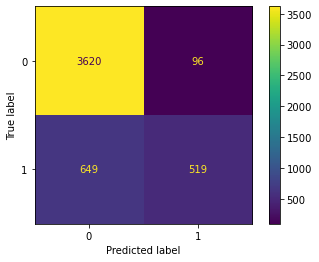

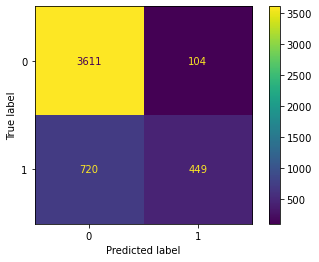

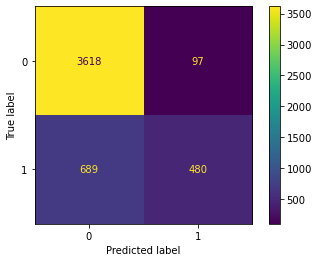

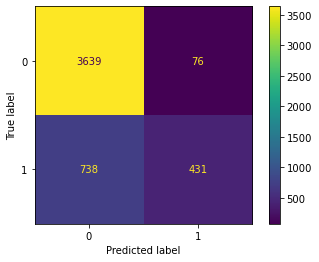

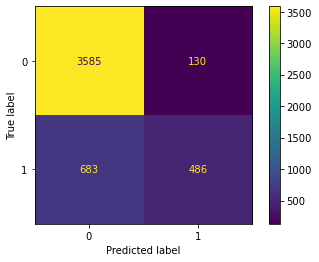

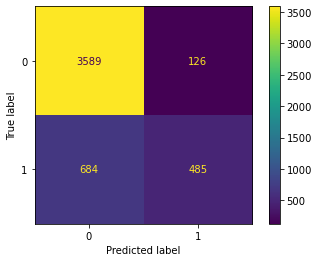

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from random import randint
from random import uniform
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# idea: use rand_search to find some starting parameters. Use StratifiedKFold to find best hyperparameters by doing it using different test sets

from sklearn.preprocessing import OneHotEncoder


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# rf = RandomForestClassifier(max_depth=2, random_state=0)
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

random_state = 1337

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = random_state)

hyperParem = {'n_estimators': [10, 50, 100, 150, 200],
              'max_depth': [5, 10, 15, 20, 25], 
              'min_samples_split': [2, 3, 5, 7, 9, 11], 
              'min_samples_leaf': [1, 3, 5, 7, 9, 11], 
              'max_features': ['sqrt', 'log2', None, 1, 4, 7, 10]}
best_parameters = []

for train_index, test_index in skf.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    rf = RandomForestClassifier()
    rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = hyperParem, 
                                 n_iter=5, 
                                 cv=5, 
                                 random_state = random_state)
    rand_search.fit(X_train, y_train)
    best_rf = rand_search.best_estimator_
    y_pred = best_rf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    accuracy_test = accuracy_score(y_test, y_pred)
    best_parameters.append((best_rf, accuracy_test))
    
print(best_parameters)



# skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = random_state)
# trainErrors = np.zeros(21-2)
# testErrors = np.zeros(21-2)
# deptValues = np.array(range(2,21))


# for i in deptValues :
#     sumTrainError = 0
#     sumTestError = 0
#     for train_index, test_index in skf.split(X, y):    
#         X_train = X[train_index]
#         y_train = y[train_index]
#         X_test = X[test_index]
#         y_test = y[test_index]
#         dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth = i)
#         dtc = dtc.fit(X_train,y_train)
#         trainPredicted = dtc.predict(X_train)
#         testPredicted = dtc.predict(X_test)
#         trainAccuracy = accuracy_score(y_train, trainPredicted)
#         testAccuracy = accuracy_score(y_test, testPredicted)
#         trainError = 1 - trainAccuracy
#         testError = 1 - testAccuracy
#         sumTrainError += trainError
#         sumTestError += testError
#     meanTrainError = sumTrainError/10
#     meanTestError = sumTestError/10
#     trainErrors[i - 2] = meanTrainError
#     testErrors[i - 2] = meanTestError

# plt.plot(deptValues, trainErrors, label='trainError')
# plt.plot(deptValues, testErrors, label='testError')
# plt.xlabel("depth")
# plt.ylabel("error")
# plt.legend()
# plt.title("train and test error when depth increases, 10-fold stratified, default min_samples_split")
# plt.show()    
